READ ME:
Open folder in VS code; select Python Kernel; Run all.
Notebook is saved with plots after running.
LaTex is used in markdown cells.
No external data files required .
Most questions that require explanations have a follow up markdown; a few have answers included within the code (i.e 4c,d).

Question 1:
When b is very large $$\sqrt{b^2-4ac}\approx |b|$$

for $$x_1=\frac{-b+|b|}{2a}$$ the problem

becomes the difference of two nearly  
equal large numbers and causes catastrophic  
cancellation

(b) we can rationalize the numerator

$$
\frac{-b+\sqrt{D}}{2a}\cdot\frac{-b-\sqrt{D}}{-b-\sqrt{D}}
=\frac{2c}{-b-\sqrt{D}}
$$

where \(D\) is the discriminant

now the problematic root can be found

$$
\frac{2c}{-b-\sqrt{b^2-4ac}}
$$
which will not have as significant or catastrophic of a cancellation error


7.389055882389215
1.0


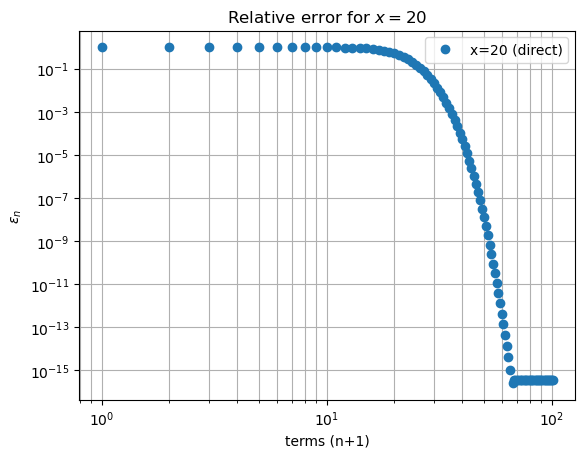

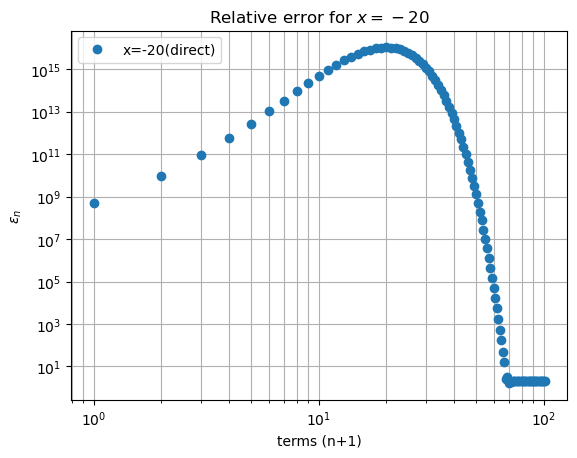

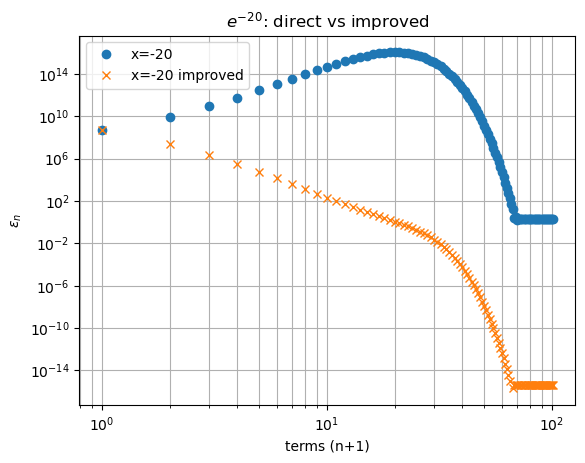

In [ ]:
#Question 2:
#e^x taylor series expansion
def exp_series(x,n):
    total=1.0
    term=1.0
    for k in range(1,n+1):
        term *= x/k
        total+= term
    return total
#example usage
print(exp_series(2,13))

#b
#test at x=0
print(exp_series(0,100))
import math
import numpy as np
import matplotlib.pyplot as plt
#compute relative error
def rel_error(approx,true):
    return abs(approx-true) / abs(true)
ns =np.arange(0,101)
x_pos, x_neg =20.0, -20.0

#true values of e^20 and e^-20
true_pos=math.exp(x_pos)
true_neg=math.exp(x_neg)
#errors for direct computation
err_pos=np.array([rel_error(exp_series(x_pos,n), true_pos) for n in ns])
err_neg_direct=np.array([rel_error(exp_series(x_neg,n), true_neg) for n in ns])

#plot for x=20
plt.figure()
plt.loglog(ns +1, err_pos, marker='o',linestyle='none', label='x=20 (direct)')
plt.xlabel('terms (n+1)'); plt.ylabel(r'$\epsilon_n$'); plt.grid(True, which='both'); plt.legend()
plt.title('Relative error for $x=20$')

#plot for x=-20 (direct)
plt.figure()
plt.loglog(ns +1, err_neg_direct, marker='o', linestyle='none', label='x=-20(direct)')
plt.xlabel('terms (n+1)'); plt.ylabel(r'$\epsilon_n$'); plt.grid(True, which='both'); plt.legend()
plt.title('Relative error for $x=-20$')

#c
#improved comp for negative x
err_neg_improved=np.array([
    rel_error(1.0/ exp_series(-x_neg,n), true_neg)
    for n in ns
])

#plot for comparison of direct vs improved x=-20
plt.figure()
plt.loglog(ns+1, err_neg_direct, marker='o', linestyle='none', label= 'x=-20')
plt.loglog(ns +1, err_neg_improved, marker='x', linestyle='none', label='x=-20 improved')
plt.xlabel('terms (n+1)')
plt.ylabel(r'$\epsilon_n$')
plt.grid(True, which='both')
plt.legend()
plt.title(r'$e^{-20}$: direct vs improved')
plt.show()

Question 2 markdown:
For positive non-alternating, the relative error drops as n grows and levels of around 1e-16. Adding additional terms beyond this does not help. For x=-20  the direct series has significant catastrophic cancellation, which is why the error blows up. For the improved, the error is largely reduced for all values of n 

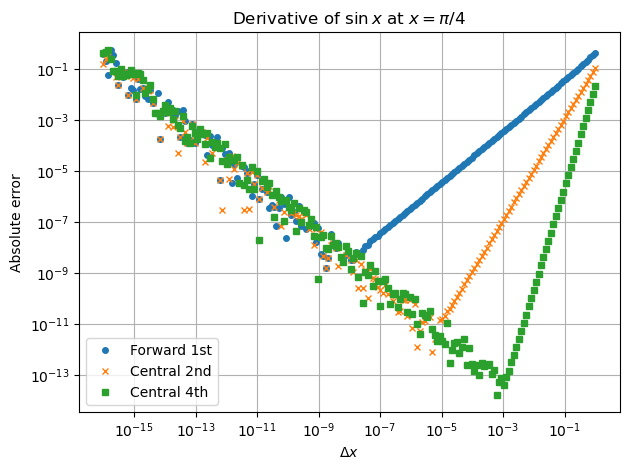

In [ ]:
#Question 3
import math
import numpy as np
import matplotlib.pyplot as plt

x0= math.pi/4
true=math.cos(x0)

def f(x): return np.sin(x)

#forward difference ( 1st order)
def d_forward(x, h):
    return (f(x+h)-f(x))/h

#Central difference (2nd order)
def d_central2(x, h):
    return (f(x+h)-f(x-h))/(2*h)

#Central difference (4th order)
def d_central4(x,h):
    return (-f(x+2*h) + 8*f(x+h)-8*f(x-h)+f(x-2*h))/(12*h)
#Error analysis
#step sizes:
hs = np.logspace(-16, 0, 200)

#compute absolute error
err_f= np.abs(d_forward(x0, hs) - true)
err_c2 = np.abs(d_central2(x0, hs)-true)
err_c4 = np.abs(d_central4(x0, hs)-true)

plt.figure()
plt.loglog(hs, err_f, 'o', label='Forward 1st', markersize=4, linestyle='none')
plt.loglog(hs, err_c2, 'x', label ='Central 2nd', markersize=4, linestyle='none')
plt.loglog(hs, err_c4, 's', label='Central 4th', markersize=4, linestyle='none')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Absolute error')
plt.title(r'Derivative of $\sin x$ at $x=\pi/4$')
plt.grid(True, which='both')
plt.legend()
plt.tight_layout()
plt.show()

Question 3 markdown:
For a moderate h the error is approximately Ch ( i.e slope of around 1). For central second, the truncation error is around $Ch^2$ until the round off dominates. A similar pattern occurs for central 4th but with a truncation error of about $Ch^4$. All curves turn upward as delta x approaches 0 and round off dominates. The best step size is where the graph bottoms out because it balances the errors. Higher order scheme has smaller minimum error but larger delta x. For small delta x all methods degrade, but higher order methods reduce truncation error and reach lower overall error.

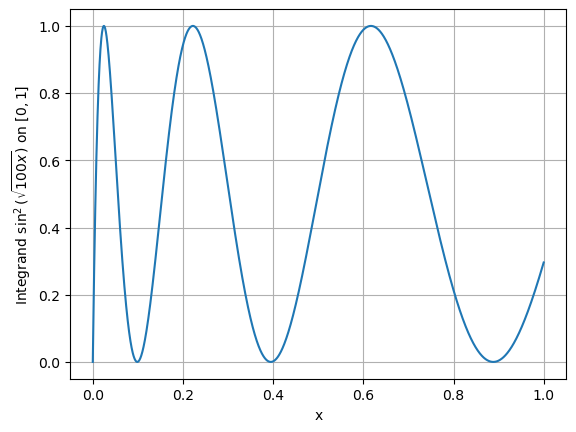

I= 0.4558320583, N=4096
0.4558324945
I=0.4558326554


In [ ]:
#Question 4
import numpy as np
import matplotlib.pyplot as plt

#Plot Integrand
def f(x):
    return np.sin(np.sqrt(100.0*x))**2

x=np.linspace(0.0, 1.0,2000)
y=f(x)

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel(r"Integrand $\sin^2(\sqrt{100x})$ on $[0,1]$")
plt.grid(True, which="both")
plt.show()

#b Adaptive Trapezoid
def adaptive_trapezoid(f,a,b, eps=1e-6, max_iter=30):
    #start with N=1, double sub intervals until error is less than epsilon
    N=1
    I_prev= .5*(b-a)*(f(a)+f(b))

    for i in range(1, max_iter+1):
        N*= 2
        h=(b-a)/N
        k= np.arange(1, N, 2)
        I=.5*I_prev +h *np.sum(f(a+k*h))

        err=abs(I-I_prev)/3.0
        if err <eps:
            return I, N, err
        I_prev=I

    return I_prev, N, err

I, N, err = adaptive_trapezoid(f, 0.0, 1.0, eps=1e-6)
print(f"I= {I:.10f}, N={N}")

#c Romberg
def f(x):
    return np.sin(np.sqrt(100.0*x))**2

eps= 1e-6
a, b =0.0, 1.0

N=1
T_prev= .5*(b-a)*(f(a)+f(b))
R_prev=[T_prev]

while True:
    N*=2
    h=(b-a)/N
    k=np.arange(1,N,2)
    T_i=0.5*T_prev+h*np.sum(f(a+k*h))
    T_prev=T_i

    R_i=[T_i]
    for m in range(1, len(R_prev)+1):
        R_i.append(R_i[m-1] +(R_i[m-1]-R_prev[m-1])/(4**m-1))

    m=len(R_prev)
    err=abs(R_i[m-1]-R_prev[m-1])/(4**m-1)

    if err <eps:
        I=R_i[-1]
        break
    R_prev=R_i

print(f"{I:.10f}")
#Romberg is significantly more efficient; we achieved the same tolerance with 64 subintervals as we did with 4096 for the adaptive trapezoid

#d) Gauss-Legendre n=9
def f(x):
    return np.sin(np.sqrt(100.0*x))**2

x=np.array([
    0.0000000000000000,
   -0.8360311073266358,
    0.8360311073266358,
   -0.9681602395076261,
    0.9681602395076261,
   -0.3242534234038089,
    0.3242534234038089,
   -0.6133714327005904,
    0.6133714327005904
])

w=np.array([
    0.3302393550012598,
    0.1806481606948574,
    0.1806481606948574,
    0.0812743883615744,
    0.0812743883615744,
    0.3123470770400029,
    0.3123470770400029,
    0.2606106964029354,
    0.2606106964029354
])

xm=0.5*(1.0+x)
wm=0.5*w

I=np.dot(wm, f(xm))
print(f"I={I:.10f}")

# first order that meets $10^-6$ is n=9

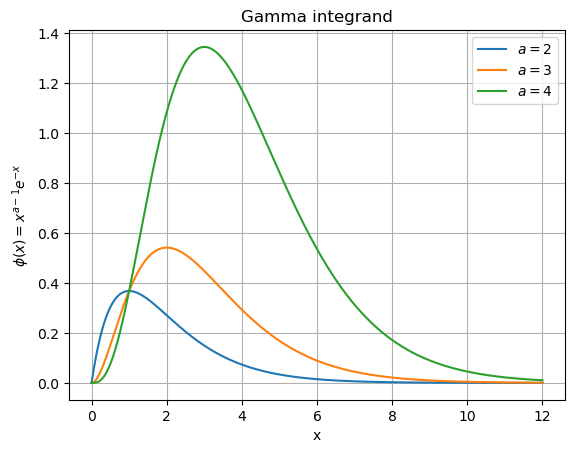

a=1.500: Γ(a) ≈ 0.8862694302
a=2.000: Γ(a) ≈ 1.0000050776
a=2.500: Γ(a) ≈ 1.3293376560
a=3.000: Γ(a) ≈ 2.0000022604
a=4.000: Γ(a) ≈ 5.9999998324
a=5.000: Γ(a) ≈ 23.9999974732


In [ ]:
#Question 5
import numpy as np
import matplotlib.pyplot as plt
import math

#gamma integrand
def phi(x,a):
    return x**(a-1) * np.exp(-x)

x=np.linspace(0,12,1000)

for a in (2,3,4):
    plt.plot(x, phi(x,a), label=fr"$a={a}$")

plt.xlabel("x")
plt.ylabel(r"$\phi(x)=x^{a-1}e^{-x}$")
plt.title(r"Gamma integrand")
plt.grid(True, which="both")
plt.legend()
plt.show()

#d #approximate gamma using Gauss-Legendre quadrature
def gamma_via_transform(a, n=32):
    c=a-1.0
    t,w=np.polynomial.legendre.leggauss(n)
    z=0.5*(1+t)
    w=0.5*w

    x=c*z/(1-z)
    jac=c/(1-z)**2

    log_phi= (a-1.0)*np.log(x)-x
    integrand=np.exp(log_phi)*jac
    return float(np.dot(w, integrand))

for a in [1.5, 2.0, 2.5, 3.0, 4.0, 5.0]:
    approx= gamma_via_transform(a, n=20)
    print(f'a={a:.3f}: Γ(a) ≈ {approx:.10f}')



Question 5 markdown:

(b) The maximum is achieved at $x = a-1$.

$\phi'(x) = (a-1)x^{a-2}e^{-x} - x^{a-1}e^{-x}
= x^{a-2}e^{-x}\,\big[(a-1) - x\big].$

This vanishes when $x = a-1$. Since $\phi(x)\to 0$ as $x\to 0$ or $x\to \infty$, the maximum occurs at  

$x^\ast = a-1.$

(c)We want the maximum to map to $z = \tfrac{1}{2}$.

$z = \dfrac{x}{x+c}, \qquad
\dfrac{a-1}{(a-1)+c} = \tfrac{1}{2}.$

Cross–multiplying gives  

$2(a-1) = (a-1)+c \quad \Rightarrow \quad c = a-1.$
